# Aggregations: min, max, and Everything in Between

## Summing the Values in an Array

In [4]:
import numpy as np
rng = np.random.default_rng()
L = rng.random(100)
big_array = rng.random(1_000_000)

In [5]:
%timeit sum(big_array)

63.8 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit np.sum(big_array)

305 µs ± 4.77 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Minimum and Maximum

In [7]:
min(big_array), max(big_array)

(1.1806934396840774e-06, 0.9999992398728657)

In [8]:
np.min(big_array), np.max(big_array)

(1.1806934396840774e-06, 0.9999992398728657)

In [9]:
%timeit min(big_array)

46.6 ms ± 5.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%timeit np.min(big_array)

129 µs ± 6.72 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
big_array.max(), big_array.min(), big_array.sum()

(0.9999992398728657, 1.1806934396840774e-06, 499595.3414728901)

### Multidimensional Aggregates

In [18]:
M = rng.integers(1, 10, (3, 4))
M

array([[8, 1, 3, 8],
       [8, 8, 2, 7],
       [6, 7, 8, 6]], dtype=int64)

In [19]:
M.sum()

72

In [20]:
M.min(axis=0)

array([6, 1, 2, 6], dtype=int64)

In [21]:
M.max(axis=1)

array([8, 8, 8], dtype=int64)

## Example: What Is the Average Height of US Presidents?

In [38]:
import csv
with open('data/president_heights.csv', 'r') as f:
    reader = csv.reader(f)
    rows = [row for row in reader]
rows[:4]

[['order', 'name', 'height(cm)'],
 ['1', 'George Washington', '189'],
 ['2', 'John Adams', '170'],
 ['3', 'Thomas Jefferson', '189']]

In [41]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [45]:
print('Mean height:       ', heights.mean())
print('Standard deviation:', heights.std())
print('Minimum height:    ', heights.min())
print('Maximum height:    ', heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [52]:
print('25th percentile: ', np.percentile(heights, 25))
print('Median:        : ', np.median(heights))
print('75th percentile: ', np.percentile(heights, 75))

25th percentile:  174.25
Median:        :  182.0
75th percentile:  183.0


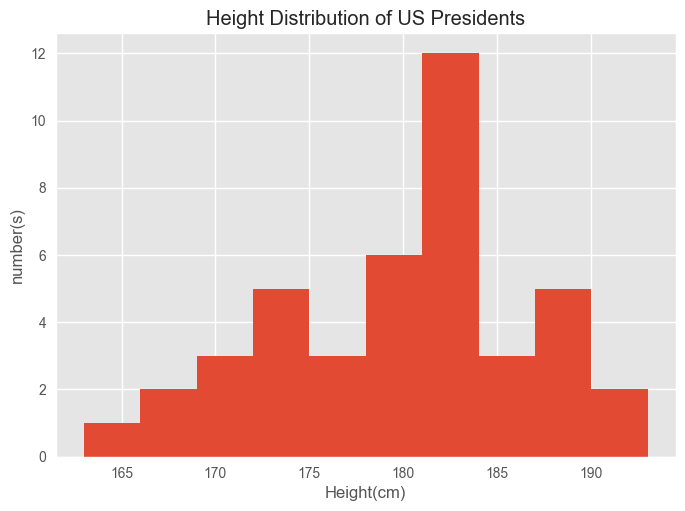

In [57]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('Height(cm)')
plt.ylabel('number(s)')
plt.show()